In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
xls = pd.ExcelFile('負面新聞＿分類-2.xlsm')
df_2020 = xls.parse('2020年')
df_2019 = xls.parse('2019年')
df_2018 = xls.parse('2018年')
df_2017 = xls.parse('2017年')
df_2015 = xls.parse('2015年')

In [26]:
df_2020.columns = ['姓名','重大新聞','新聞標題及備註','相關連結','domain_name','分類']
df_2019.columns = ['姓名','重大新聞','新聞標題及備註','相關連結','domain_name','分類','']
df_2018.columns = ['姓名','重大新聞','新聞標題及備註','相關連結','domain_name','分類']
df_2017.columns = ['姓名','重大新聞','新聞標題及備註','相關連結','domain_name','分類']
df_2015.columns = ['姓名','重大新聞','新聞標題及備註','相關連結','domain_name','分類']

In [27]:
df_2020.drop(index=[0,1,2],inplace=True)
df_2020 = df_2020.reset_index()
df_2020.drop(columns=['index'],inplace=True)
df_2019.drop(index=[0,1,2],inplace=True)
df_2019 = df_2019.reset_index()
df_2019.drop(columns=['index'],inplace=True)
df_2018.drop(index=[0,1,2],inplace=True)
df_2018 = df_2018.reset_index()
df_2018.drop(columns=['index'],inplace=True)
df_2017.drop(index=[0,1,2],inplace=True)
df_2017 = df_2017.reset_index()
df_2017.drop(columns=['index'],inplace=True)
df_2015.drop(index=[0,1,2],inplace=True)
df_2015 = df_2015.reset_index()
df_2015.drop(columns=['index'],inplace=True)

In [28]:
df_all = pd.concat((df_2020,df_2019,df_2018,df_2017,df_2015),axis=0)

In [39]:
df_all = df_all.dropna(axis=0, how='any',subset=['分類'], inplace=False)
df_all = df_all.drop_duplicates('新聞標題及備註',inplace=False)
df_all = df_all.drop([''],axis=1)

In [41]:
df_all.shape

(1544, 6)

In [42]:
pd.set_option('display.max_rows', 100)
pd_view = df_all.groupby('分類')['分類'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [43]:
pd_view['percentage'] = pd_view['count'].apply(lambda x: round((x/sum(pd_view['count'])*100),1))

In [44]:
pd_view

,分類,count,percentage
52,社會,1025,66.4
0,404,196,12.7
39,政治,40,2.6
58,要聞,33,2.1
7,三立,22,1.4
50,生活,21,1.4
32,地方,21,1.4
62,財經,15,1.0
49,焦點,13,0.8
60,證券產業,12,0.8


In [45]:
ltn = sum(df_all['domain_name'].str.contains('ltn'))/df_all.shape[0]*100
chinatimes = sum(df_all['domain_name'].str.contains('chinatimes'))/df_all.shape[0]*100
udn = sum(df_all['domain_name'].str.contains('udn'))/df_all.shape[0]*100
ettoday = sum(df_all['domain_name'].str.contains('ettoday'))/df_all.shape[0]*100
appledaily = sum(df_all['domain_name'].str.contains('appledaily'))/df_all.shape[0]*100
cna = sum(df_all['domain_name'].str.contains('cna'))/df_all.shape[0]*100
setn = sum(df_all['domain_name'].str.contains('setn'))/df_all.shape[0]*100
yahoo = sum(df_all['domain_name'].str.contains('yahoo'))/df_all.shape[0]*100
mirrormedia = sum(df_all['domain_name'].str.contains('mirrormedia'))/df_all.shape[0]*100
tvbs = sum(df_all['domain_name'].str.contains('tvbs'))/df_all.shape[0]*100

In [46]:
print('ltn in total:         {:0.2f} %'.format(ltn))
print('appledaily in total:  {:0.2f} %'.format(appledaily))
print('udn in total:         {:0.2f} %'.format(udn))
print('chinatimes in total:  {:0.2f} %'.format(chinatimes))
print('ettoday in total:     {:0.2f} %'.format(ettoday))
print('yahoo in total:       {:0.2f} %'.format(yahoo))
print('cna in total:         {:0.2f} %'.format(cna))
print('setn in total:        {:0.2f} %'.format(setn))
print('mirrormedia in total: {:0.2f} %'.format(mirrormedia))
print('tvbs in total:        {:0.2f} %'.format(tvbs))


ltn in total:         32.58 %
appledaily in total:  19.04 %
udn in total:         15.41 %
chinatimes in total:  13.08 %
ettoday in total:     4.15 %
yahoo in total:       4.34 %
cna in total:         2.72 %
setn in total:        1.30 %
mirrormedia in total: 1.17 %
tvbs in total:        1.04 %


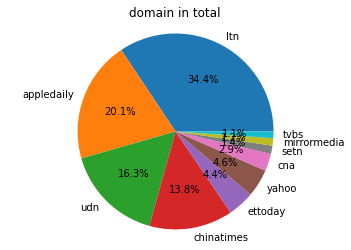

In [47]:
my_data = [ltn,appledaily,udn,chinatimes,ettoday,yahoo,cna,setn,mirrormedia,tvbs]
my_labels = 'ltn','appledaily','udn','chinatimes','ettoday','yahoo','cna','setn','mirrormedia','tvbs'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('domain in total')
plt.axis('equal')
plt.show()

In [80]:
df_all['domain_name_new'] = df_all['domain_name']
df_all['domain_name_new'] = df_all['domain_name_new'].replace(to_replace =["ltn.com.tw","news.ltn.com.tw",'m.ltn.com.tw','.ltn.com.tw','ec.ltn.com.tw'],  
                            value ="ltn",inplace=False)
df_all['domain_name_new'] = df_all['domain_name_new'].replace(to_replace =["tw.appledaily.com","tw.news.appledaily.com",'appledaily.com','ppledaily.com'],  
                            value ="appledaily",inplace=False)
df_all['domain_name_new'] = df_all['domain_name_new'].replace(to_replace =["tw.news.yahoo.com",'news.yahoo.com'],  
                            value ="yahoo",inplace=False)

In [81]:
pd_view2 = df_all.groupby('domain_name_new')['新聞標題及備註'].count().reset_index(name='count').sort_values(['count'], ascending=False)

In [82]:
pd_view2 

,domain_name_new,count
25,ltn,501
3,appledaily,296
44,udn.com,207
5,chinatimes.com,201
48,yahoo,64
15,ettoday.net,63
7,cna.com.tw,42
27,money.udn.com,31
26,mirrormedia.mg,18
36,setn.com,17


In [92]:
def groupby_cat(name,df):
    new_df= df[df['domain_name_new']==name].groupby('分類')['分類'].count().reset_index(name='count').sort_values(['count'], ascending=False)
    new_df['ratio'] = round(new_df['count']/sum(new_df['count']),2)*100
    return new_df

In [93]:
ltn_cat = groupby_cat('ltn',df_all)
apple_cat = groupby_cat('appledaily',df_all)
udn_cat = groupby_cat('udn.com',df_all)
china_cat = groupby_cat('chinatimes.com',df_all)
yahoo_cat = groupby_cat('yahoo',df_all)
ettoday = groupby_cat('ettoday.net',df_all)
cna_cat =  groupby_cat('cna.com.tw',df_all)
money_udn_cat = groupby_cat('money.udn.com',df_all)
mirrormedia_cat = groupby_cat('mirrormedia.mg',df_all)
setn_cat = groupby_cat('setn.com',df_all)

In [96]:
ltn_cat 

,分類,count,ratio
14,社會,382,76.0
10,政治,30,6.0
0,404,21,4.0
13,生活,13,3.0
17,證券產業,12,2.0
19,財經政策,9,2.0
12,焦點,7,1.0
6,地方,6,1.0
18,財經,4,1.0
2,中央通訊社,3,1.0


In [97]:
apple_cat

,分類,count,ratio
6,社會,237,80.0
7,要聞,29,10.0
0,404,13,4.0
3,政治,5,2.0
5,生活,4,1.0
4,日報/要聞,3,1.0
1,國際,2,1.0
2,娛樂時尚,2,1.0
8,財經地產,1,0.0


In [98]:
udn_cat

,分類,count,ratio
0,404,127,61.0
3,社會,77,37.0
1,全球,1,0.0
2,民生戰線,1,0.0
4,綜合,1,0.0


In [99]:
china_cat

,分類,count,ratio
6,社會,168,84.0
3,地方,12,6.0
7,財經,8,4.0
4,焦點,5,2.0
2,刑案,2,1.0
5,生活,2,1.0
8,財經要聞,2,1.0
0,404,1,0.0
1,三立,1,0.0


In [100]:
yahoo_cat

,分類,count,ratio
4,三立,13,20.0
6,中央通訊,7,11.0
0,404,4,6.0
19,社會,4,6.0
21,鏡週刊,4,6.0
3,yahoo即時新聞,4,6.0
16,東森,3,5.0
10,中華,3,5.0
12,今日新聞,3,5.0
18,民視,3,5.0


In [101]:
ettoday

,分類,count,ratio
8,社會,51,81.0
0,404,4,6.0
4,地方,2,3.0
1,ETtoday財經雲,1,2.0
2,國際,1,2.0
3,國際社會,1,2.0
5,政治,1,2.0
6,法律,1,2.0
7,生活,1,2.0


In [102]:
cna_cat

,分類,count,ratio
0,社會,38,90.0
1,證券,2,5.0
2,財經政策,1,2.0
3,重點新聞,1,2.0


In [103]:
money_udn_cat

,分類,count,ratio
0,404,15,48.0
2,產業,4,13.0
5,證券,4,13.0
1,商情,3,10.0
4,要聞,3,10.0
3,社會,1,3.0
6,金融,1,3.0


In [104]:
mirrormedia_cat

,分類,count,ratio
2,社會,11,61.0
4,鏡週刊,3,17.0
3,財經,2,11.0
0,政治,1,6.0
1,焦點,1,6.0


In [105]:
setn_cat

,分類,count,ratio
1,社會,10,59.0
0,三立,7,41.0


In [50]:
ltn_society = sum((df_all['相關連結'].str.contains('ltn')) & (df_all['相關連結'].str.contains('society')))/sum(df_all['domain_name'].str.contains('ltn'))*100

In [51]:
ltn_society

81.76400476758046

In [56]:
chinatimes_realtime = sum((df_all['相關連結'].str.contains('chinatimes')) & (df_all['相關連結'].str.contains('realtimenews')))/sum(df_all['domain_name'].str.contains('chinatimes'))*100

In [57]:
chinatimes_realtime

83.07210031347962

In [68]:
appledaily_realtime = sum((df_all['相關連結'].str.contains('appledaily')) & (df_all['相關連結'].str.contains('realtime')))/sum(df_all['domain_name'].str.contains('appledaily'))*100

In [69]:
appledaily_realtime

81.52866242038218

In [78]:
udn_money_story = sum((df_all['相關連結'].str.contains('udn')) & (df_all['相關連結'].str.contains('story'))& (df_all['相關連結'].str.contains('money')))/sum(df_all['domain_name'].str.contains('udn'))*100

In [79]:
udn_money_story

13.839285714285715

In [76]:
udn_news_story = sum((df_all['相關連結'].str.contains('udn')) & (df_all['相關連結'].str.contains('story'))& (df_all['相關連結'].str.contains('news')))/sum(df_all['domain_name'].str.contains('udn'))*100

In [77]:
udn_news_story

90.17857142857143

In [ ]:
udn_news_story = sum((df_all['相關連結'].str.contains('udn')) & (df_all['相關連結'].str.contains('story'))& (df_all['相關連結'].str.contains('news')))/sum(df_all['domain_name'].str.contains('udn'))*100

In [90]:
ettoday= sum(df_all['相關連結'].str.contains('ettoday.net/news')) /sum(df_all['domain_name'].str.contains('ettoday'))*100

In [91]:
ettoday

104.54545454545455